# Лабораторная работа №1 (Проведение исследований с алгоритмом KNN)

## 1. Выбор начальных условий

### Выбор набора данных для задачи классификации

Был выбран датасет [Sloan Digital Sky Survey DR14](<data/Skyserver_SQL2_27_2018 6_51_39 PM.csv>).

Автоматическая классификация астрономических объектов (звезды, галактики, квазары) на основе их спектральных характеристик важна для обработки больших объемов данных, генерируемых современными телескопами.

### Выбор набора данных для задачи регрессии

Был выбран датасет [Abalone Dataset](data/abalone.csv).

Морское ушко — это ценный моллюск, возраст которого напрямую определяет его стоимость и зрелость для вылова. Прямое определение возраста — трудоемкая и разрушающая процедура, требующая разрезания раковины. Предсказание возраста на основе легко измеримых характеристик является неразрушающим и быстрым методом для аквакультуры и экологического мониторинга.

### Выбор метрик качества

Для классификации:
- Accuracy (доля правильно предсказанных объектов среди всех, полезна для общей оценки модели на сбалансированных данных)
- Precision (показывает, насколько можно доверять положительному прогнозу модели)
- Recall (показывает, какую долю объектов этого класса модель смогла обнаружить)
- F1-Score (позволяет получить агрегированную оценку по всем классам, полезна на несбалансированных данных)
- Матрица ошибок (наглядное представление того, какие классы путает модель)

Для регрессии:
- MAE (cредняя величина абсолютных ошибок в единицах целевой переменной)
- MSE (cреднее значение квадратов ошибок, cильнее штрафует за большие ошибки)
- RMSE (как и MSE, более чувствительна к ошибкам, но измеряется в единицах целевой переменной)
- R^2 (оценивает, насколько модель лучше тривиального предсказания среднего возраста)

## 2. Создание бейзлайна и оценка качества

### Классификация

Загрузим датасет и посмотрим на данные

In [1]:
import pandas as pd

df_class = pd.read_csv('data/Skyserver_SQL2_27_2018 6_51_39 PM.csv')

print(f"Размерность данных")
print(df_class.shape)
print(f"\nИнформация о данных")
print(df_class.info())
print(f"\nПервые 5 строк")
print(df_class.head())
print(f"\nРаспределение классов")
print(df_class['class'].value_counts())

Размерность данных
(10000, 18)

Информация о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)

Выделим исходные признаки, которые непосредственно описывают физические свойства объектов и целевую переменную. А также закодируем таргет, так как это категориальный признак.

In [2]:
from sklearn.preprocessing import LabelEncoder

X_class = df_class[['u', 'g', 'r', 'i', 'z', 'redshift']]
y_class = df_class['class']

le = LabelEncoder()
y_class_encoded = le.fit_transform(y_class)
class_names = le.classes_

Разделим данные на выборку для обучения и тестовую выборку.

In [3]:
from sklearn.model_selection import train_test_split

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class_encoded, test_size=0.2, random_state=42
)

Обучим базовую модель KNN и выполним предсказания на тестовой выборке.

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_class, y_train_class)

y_pred_class = knn_classifier.predict(X_test_class)

Опишем функцию, которая будет использоваться для оценки обученной модели классификации.

1. Accuracy: 0.9485

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.974549 0.922691  0.947911
   QSO   0.978495 0.957895  0.968085
  STAR   0.913892 0.977887  0.944807

3. Macro F1: 0.9536

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     919    2    75
QSO          8  182     0
STAR        16    2   796


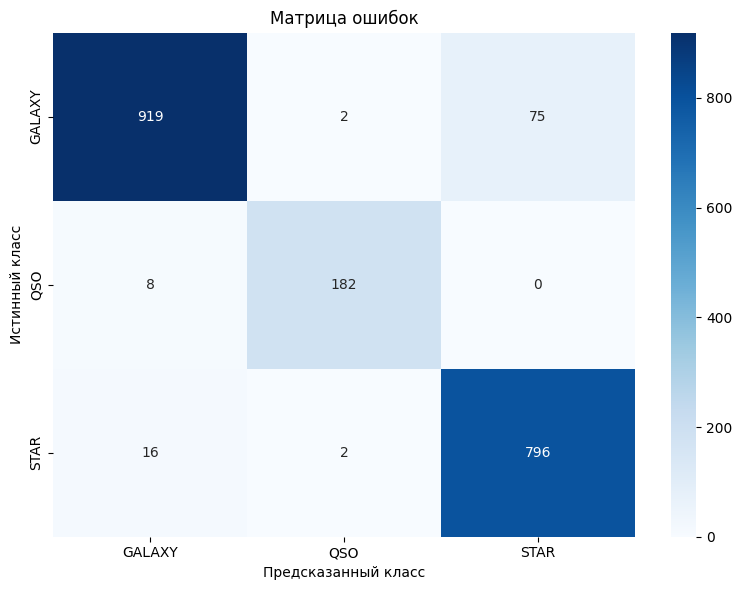

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix
)

def evaluate_classification_model(y_true, y_pred, class_names):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"1. Accuracy: {accuracy:.4f}")
    
    print(f"\n2. Метрики по классам:")
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)
    
    metrics_df = pd.DataFrame({
        'Класс': class_names,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    })
    print(metrics_df.to_string(index=False))
    
    macro_f1 = f1_score(y_true, y_pred, average='macro')
    print(f"\n3. Macro F1: {macro_f1:.4f}")
    
    print(f"\n4. Матрица ошибок:")
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
    print(cm_df)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Матрица ошибок')
    plt.ylabel('Истинный класс')
    plt.xlabel('Предсказанный класс')
    plt.tight_layout()
    plt.show()
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'macro_f1': macro_f1,
        'confusion_matrix': cm
    }

class_metrics = evaluate_classification_model(y_test_class, y_pred_class, class_names)

### Регрессия

Загрузим датасет и посмотрим на данные

In [6]:
df_reg = pd.read_csv('data/abalone.csv')

print(f"Размерность данных")
print(df_reg.shape)
print(f"\nИнформация о данных")
print(df_reg.info())
print(f"\nПервые 5 строк")
print(df_reg.head())
print(f"\nСтатистика по числовым признакам")
print(df_reg.describe())

Размерность данных
(4177, 9)

Информация о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None

Первые 5 строк
  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.4

Выделим признаки и целевую переменную. Закодируем категориальный признак Sex.

In [7]:
X_reg = df_reg.drop('Rings', axis=1)
y_reg = df_reg['Rings']

le_sex = LabelEncoder()
X_reg_encoded = X_reg.copy()
X_reg_encoded['Sex'] = le_sex.fit_transform(X_reg['Sex'])

Разделим данные на выборку для обучения и тестовую выборку.

In [8]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_encoded, y_reg, test_size=0.2, random_state=42
)

Обучим базовую модель KNN и выполним предсказания на тестовой выборке.

In [9]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_reg, y_train_reg)

y_pred_reg = knn_regressor.predict(X_test_reg)

Опишем функцию, которая будет использоваться для оценки обученной модели регрессии.

In [10]:
import numpy as np
from sklearn.metrics import (
    mean_absolute_error, 
    mean_squared_error, 
    r2_score,
)

def evaluate_regression_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    print(f"1. MAE: {mae:.4f}")

    mse = mean_squared_error(y_true, y_pred)
    print(f"\n2. MSE: {mse:.4f}")
    
    rmse = np.sqrt(mse)
    print(f"\n3. RMSE: {rmse:.4f}")
    
    r2 = r2_score(y_true, y_pred)
    print(f"\n4. R²: {r2:.4f}")
    
    return {
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    }

reg_metrics = evaluate_regression_model(y_test_reg, y_pred_reg)

1. MAE: 1.5560

2. MSE: 5.1315

3. RMSE: 2.2653

4. R²: 0.5260


## 3. Улучшение бейзлайна

Перейдем к формулированию и проверкам гипотез

### Классификация

**Гипотеза 1:** Добавление стандартизации признаков и стратификации при разбиении на выборки улучшит качество модели.

Результаты гипотезы 1:
1. Accuracy: 0.9585

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.980126 0.937000  0.958078
   QSO   0.993827 0.947059  0.969880
  STAR   0.928571 0.986747  0.956776

3. Macro F1: 0.9616

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     937    0    63
QSO          9  161     0
STAR        10    1   819


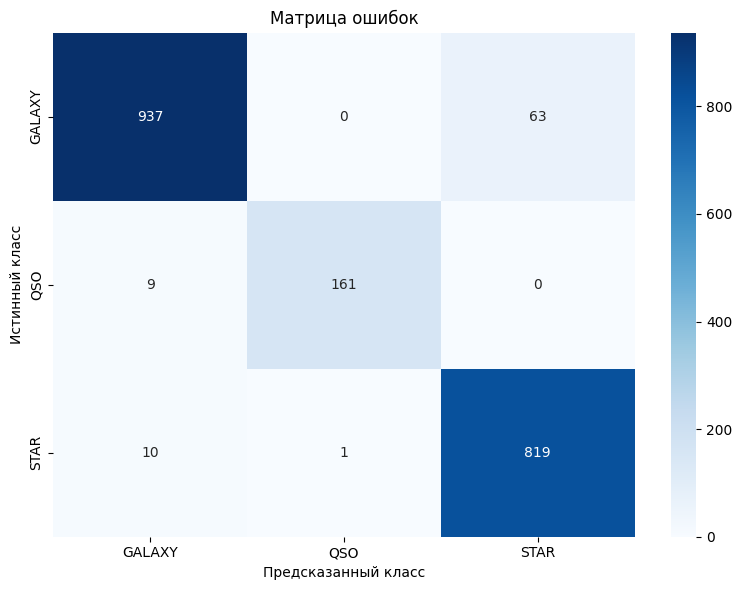

In [11]:
from sklearn.preprocessing import StandardScaler

X_train_class_h1, X_test_class_h1, y_train_class_h1, y_test_class_h1 = train_test_split(
    X_class, y_class_encoded, test_size=0.2, stratify=y_class_encoded, random_state=42
)

scaler = StandardScaler()
X_train_class_h1_scaled = scaler.fit_transform(X_train_class_h1)
X_test_class_h1_scaled = scaler.transform(X_test_class_h1)

knn_classifier_h1 = KNeighborsClassifier(n_neighbors=5)
knn_classifier_h1.fit(X_train_class_h1_scaled, y_train_class_h1)

y_pred_class_h1 = knn_classifier_h1.predict(X_test_class_h1_scaled)

print("Результаты гипотезы 1:")
class_metrics_h1 = evaluate_classification_model(y_test_class_h1, y_pred_class_h1, class_names)

**Гипотеза 2:** Подбор оптимального числа соседей (k) на кросс-валидации улучшит качество модели.

Лучший параметр k: 3
Лучший F1-score на кросс-валидации: 0.9585

Результаты гипотезы 2:
1. Accuracy: 0.9605

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.978193 0.942000  0.959755
   QSO   1.000000 0.941176  0.969697
  STAR   0.933865 0.986747  0.959578

3. Macro F1: 0.9630

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     942    0    58
QSO         10  160     0
STAR        11    0   819


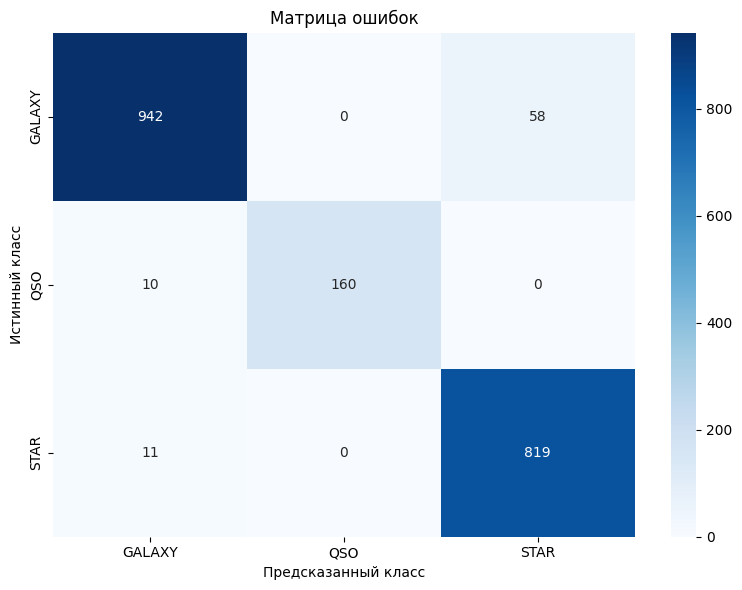

In [12]:
from sklearn.model_selection import cross_val_score, GridSearchCV

param_grid = {'n_neighbors': range(3, 21, 2)}
grid_search_h2 = GridSearchCV(
    KNeighborsClassifier(), 
    param_grid, 
    cv=5, 
    scoring='f1_macro',
    n_jobs=-1
)
grid_search_h2.fit(X_train_class_h1_scaled, y_train_class_h1)

print(f"Лучший параметр k: {grid_search_h2.best_params_['n_neighbors']}")
print(f"Лучший F1-score на кросс-валидации: {grid_search_h2.best_score_:.4f}")

knn_classifier_h2 = grid_search_h2.best_estimator_
y_pred_class_h2 = knn_classifier_h2.predict(X_test_class_h1_scaled)

print("\nРезультаты гипотезы 2:")
class_metrics_h2 = evaluate_classification_model(y_test_class_h1, y_pred_class_h2, class_names)

**Гипотеза 3:** Использование взвешенных расстояний улучшит качество модели.

Лучшие параметры: {'n_neighbors': 3, 'weights': 'distance'}
Лучший F1-score на кросс-валидации: 0.9591

Результаты гипотезы 3:
1. Accuracy: 0.9615

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.979232 0.943000  0.960774
   QSO   1.000000 0.941176  0.969697
  STAR   0.935006 0.987952  0.960750

3. Macro F1: 0.9637

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     943    0    57
QSO         10  160     0
STAR        10    0   820


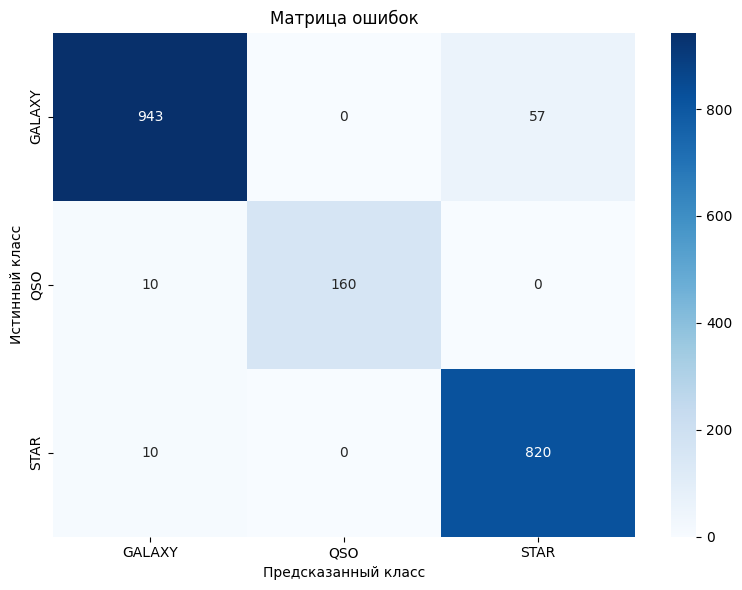

In [13]:
param_grid_h3 = {
    'n_neighbors': [grid_search_h2.best_params_['n_neighbors']],
    'weights': ['uniform', 'distance']
}
grid_search_h3 = GridSearchCV(
    KNeighborsClassifier(), 
    param_grid_h3, 
    cv=5, 
    scoring='f1_macro',
    n_jobs=-1
)
grid_search_h3.fit(X_train_class_h1_scaled, y_train_class_h1)

print(f"Лучшие параметры: {grid_search_h3.best_params_}")
print(f"Лучший F1-score на кросс-валидации: {grid_search_h3.best_score_:.4f}")

knn_classifier_h3 = grid_search_h3.best_estimator_
y_pred_class_h3 = knn_classifier_h3.predict(X_test_class_h1_scaled)

print("\nРезультаты гипотезы 3:")
class_metrics_h3 = evaluate_classification_model(y_test_class_h1, y_pred_class_h3, class_names)

Сравним результаты всех гипотез с базовой моделью:

In [14]:
comparison_class = pd.DataFrame({
    'Модель': ['Базовый бейзлайн', 'Гипотеза 1 (стандартизация)', 
               'Гипотеза 2 (подбор k)', 'Гипотеза 3 (взвешенные расстояния)'],
    'Accuracy': [class_metrics['accuracy'], class_metrics_h1['accuracy'],
                 class_metrics_h2['accuracy'], class_metrics_h3['accuracy']],
    'Macro F1': [class_metrics['macro_f1'], class_metrics_h1['macro_f1'],
                 class_metrics_h2['macro_f1'], class_metrics_h3['macro_f1']]
})

print("Сравнение моделей классификации:")
print(comparison_class.to_string(index=False))

Сравнение моделей классификации:
                            Модель  Accuracy  Macro F1
                  Базовый бейзлайн    0.9485  0.953601
       Гипотеза 1 (стандартизация)    0.9585  0.961578
             Гипотеза 2 (подбор k)    0.9605  0.963010
Гипотеза 3 (взвешенные расстояния)    0.9615  0.963740


**Выводы по классификации:**

На основе проверки гипотез формируем улучшенный бейзлайн, который включает:
1. Стандартизацию признаков
2. Стратификацию при разбиении на выборки
3. Подбор оптимального числа соседей
4. Использование взвешенных расстояний

Обучим финальную улучшенную модель:

Результаты улучшенного бейзлайна для классификации:
1. Accuracy: 0.9615

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.979232 0.943000  0.960774
   QSO   1.000000 0.941176  0.969697
  STAR   0.935006 0.987952  0.960750

3. Macro F1: 0.9637

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     943    0    57
QSO         10  160     0
STAR        10    0   820


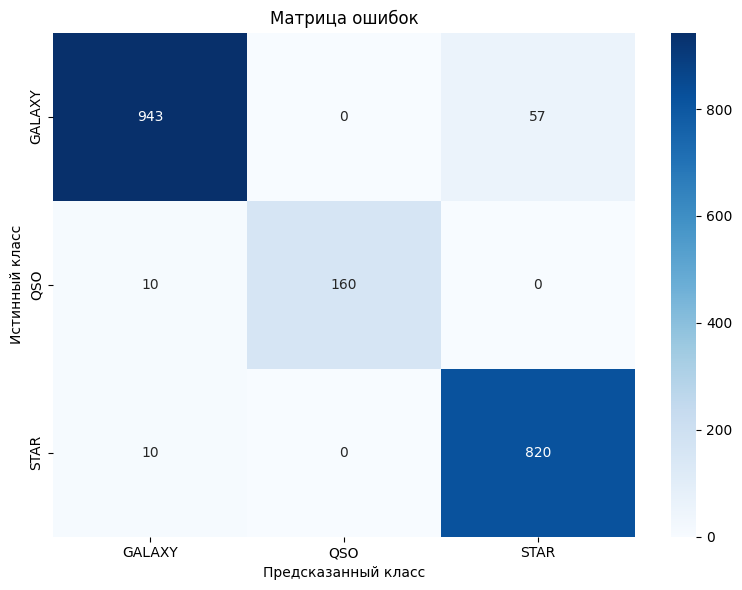

In [15]:
knn_classifier_improved = KNeighborsClassifier(
    n_neighbors=grid_search_h3.best_params_['n_neighbors'],
    weights=grid_search_h3.best_params_['weights']
)
knn_classifier_improved.fit(X_train_class_h1_scaled, y_train_class_h1)
y_pred_class_improved = knn_classifier_improved.predict(X_test_class_h1_scaled)

print("Результаты улучшенного бейзлайна для классификации:")
class_metrics_improved = evaluate_classification_model(y_test_class_h1, y_pred_class_improved, class_names)

### Регрессия

**Гипотеза 1:** Добавление стандартизации признаков улучшит качество модели.

In [16]:
scaler_reg = StandardScaler()
X_train_reg_h1_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_h1_scaled = scaler_reg.transform(X_test_reg)

knn_regressor_h1 = KNeighborsRegressor(n_neighbors=5)
knn_regressor_h1.fit(X_train_reg_h1_scaled, y_train_reg)

y_pred_reg_h1 = knn_regressor_h1.predict(X_test_reg_h1_scaled)

print("Результаты гипотезы 1:")
reg_metrics_h1 = evaluate_regression_model(y_test_reg, y_pred_reg_h1)

Результаты гипотезы 1:
1. MAE: 1.6084

2. MSE: 5.2379

3. RMSE: 2.2887

4. R²: 0.5161


**Гипотеза 2:** Подбор оптимального числа соседей (k) на кросс-валидации улучшит качество модели.

In [17]:
param_grid_reg = {'n_neighbors': range(3, 21, 2)}
grid_search_reg_h2 = GridSearchCV(
    KNeighborsRegressor(), 
    param_grid_reg, 
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search_reg_h2.fit(X_train_reg_h1_scaled, y_train_reg)

print(f"Лучший параметр k: {grid_search_reg_h2.best_params_['n_neighbors']}")
print(f"Лучший MSE на кросс-валидации: {-grid_search_reg_h2.best_score_:.4f}")

knn_regressor_h2 = grid_search_reg_h2.best_estimator_
y_pred_reg_h2 = knn_regressor_h2.predict(X_test_reg_h1_scaled)

print("\nРезультаты гипотезы 2:")
reg_metrics_h2 = evaluate_regression_model(y_test_reg, y_pred_reg_h2)

Лучший параметр k: 11
Лучший MSE на кросс-валидации: 4.9642

Результаты гипотезы 2:
1. MAE: 1.5731

2. MSE: 5.1318

3. RMSE: 2.2654

4. R²: 0.5259


**Гипотеза 3:** Использование взвешенных расстояний улучшит качество модели.

In [18]:
param_grid_reg_h3 = {
    'n_neighbors': [grid_search_reg_h2.best_params_['n_neighbors']],
    'weights': ['uniform', 'distance']
}
grid_search_reg_h3 = GridSearchCV(
    KNeighborsRegressor(), 
    param_grid_reg_h3, 
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search_reg_h3.fit(X_train_reg_h1_scaled, y_train_reg)

print(f"Лучшие параметры: {grid_search_reg_h3.best_params_}")
print(f"Лучший MSE на кросс-валидации: {-grid_search_reg_h3.best_score_:.4f}")

knn_regressor_h3 = grid_search_reg_h3.best_estimator_
y_pred_reg_h3 = knn_regressor_h3.predict(X_test_reg_h1_scaled)

print("\nРезультаты гипотезы 3:")
reg_metrics_h3 = evaluate_regression_model(y_test_reg, y_pred_reg_h3)

Лучшие параметры: {'n_neighbors': 11, 'weights': 'distance'}
Лучший MSE на кросс-валидации: 4.9392

Результаты гипотезы 3:
1. MAE: 1.5752

2. MSE: 5.1252

3. RMSE: 2.2639

4. R²: 0.5265


Сравним результаты всех гипотез с базовой моделью:

In [19]:
comparison_reg = pd.DataFrame({
    'Модель': ['Базовый бейзлайн', 'Гипотеза 1 (стандартизация)', 
               'Гипотеза 2 (подбор k)', 'Гипотеза 3 (взвешенные расстояния)'],
    'MAE': [reg_metrics['mae'], reg_metrics_h1['mae'],
            reg_metrics_h2['mae'], reg_metrics_h3['mae']],
    'RMSE': [reg_metrics['rmse'], reg_metrics_h1['rmse'],
             reg_metrics_h2['rmse'], reg_metrics_h3['rmse']],
    'R²': [reg_metrics['r2'], reg_metrics_h1['r2'],
           reg_metrics_h2['r2'], reg_metrics_h3['r2']]
})

print("Сравнение моделей регрессии:")
print(comparison_reg.to_string(index=False))

Сравнение моделей регрессии:
                            Модель      MAE     RMSE       R²
                  Базовый бейзлайн 1.555981 2.265278 0.525969
       Гипотеза 1 (стандартизация) 1.608373 2.288655 0.516135
             Гипотеза 2 (подбор k) 1.573075 2.265356 0.525937
Гипотеза 3 (взвешенные расстояния) 1.575222 2.263895 0.526548


**Выводы по регрессии:**

На основе проверки гипотез формируем улучшенный бейзлайн, который включает:
1. Стандартизацию признаков
2. Подбор оптимального числа соседей
3. Использование взвешенных расстояний

Обучим финальную улучшенную модель:

In [20]:
knn_regressor_improved = KNeighborsRegressor(
    n_neighbors=grid_search_reg_h3.best_params_['n_neighbors'],
    weights=grid_search_reg_h3.best_params_['weights']
)
knn_regressor_improved.fit(X_train_reg_h1_scaled, y_train_reg)
y_pred_reg_improved = knn_regressor_improved.predict(X_test_reg_h1_scaled)

print("Результаты улучшенного бейзлайна для регрессии:")
reg_metrics_improved = evaluate_regression_model(y_test_reg, y_pred_reg_improved)

Результаты улучшенного бейзлайна для регрессии:
1. MAE: 1.5752

2. MSE: 5.1252

3. RMSE: 2.2639

4. R²: 0.5265


## 4. Имплементация алгоритма машинного обучения

### Классификация

Реализуем алгоритм KNN для классификации с нуля:

In [21]:
class MyKNNClassifier:
    def __init__(self, n_neighbors=5, weights='uniform'):
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self
    
    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def _get_neighbors(self, x):
        distances = []
        for i in range(len(self.X_train)):
            dist = self._euclidean_distance(x, self.X_train[i])
            distances.append((dist, self.y_train[i]))
        distances.sort(key=lambda t: t[0])
        neighbors = distances[:self.n_neighbors]
        return neighbors
    
    def predict(self, X):
        predictions = []
        X = np.array(X)
        for x in X:
            neighbors = self._get_neighbors(x)
            if self.weights == 'uniform':
                neighbor_labels = [label for _, label in neighbors]
                prediction = max(set(neighbor_labels), key=neighbor_labels.count)
            else:
                neighbor_labels = [label for _, label in neighbors]
                neighbor_distances = [dist for dist, _ in neighbors]
                weights = [1.0 / (d + 1e-10) for d in neighbor_distances]
                label_weights = {}
                for label, weight in zip(neighbor_labels, weights):
                    label_weights[label] = label_weights.get(label, 0) + weight
                prediction = max(label_weights, key=label_weights.get)
            predictions.append(prediction)
        return np.array(predictions)

Обучим имплементированную модель на исходных данных (без улучшений):

Результаты имплементированной модели классификации (базовый вариант):
1. Accuracy: 0.9485

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.974549 0.922691  0.947911
   QSO   0.978495 0.957895  0.968085
  STAR   0.913892 0.977887  0.944807

3. Macro F1: 0.9536

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     919    2    75
QSO          8  182     0
STAR        16    2   796


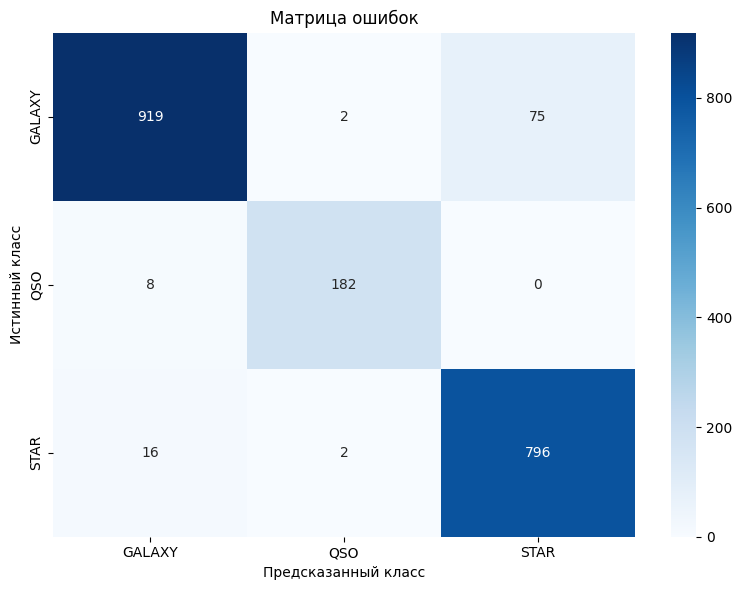

In [22]:
my_knn_classifier = MyKNNClassifier(n_neighbors=5, weights='uniform')
my_knn_classifier.fit(X_train_class.values, y_train_class)
y_pred_my_class = my_knn_classifier.predict(X_test_class.values)

print("Результаты имплементированной модели классификации (базовый вариант):")
my_class_metrics = evaluate_classification_model(y_test_class, y_pred_my_class, class_names)

Сравним результаты имплементированной модели с базовым бейзлайном из пункта 2:

In [23]:
comparison_my_class = pd.DataFrame({
    'Модель': ['Базовый бейзлайн (sklearn)', 'Имплементированная модель'],
    'Accuracy': [class_metrics['accuracy'], my_class_metrics['accuracy']],
    'Macro F1': [class_metrics['macro_f1'], my_class_metrics['macro_f1']]
})

print("Сравнение имплементированной модели с базовым бейзлайном:")
print(comparison_my_class.to_string(index=False))

Сравнение имплементированной модели с базовым бейзлайном:
                    Модель  Accuracy  Macro F1
Базовый бейзлайн (sklearn)    0.9485  0.953601
 Имплементированная модель    0.9485  0.953601


Теперь применим техники из улучшенного бейзлайна (стандартизация, оптимальный k, взвешенные расстояния):

Результаты имплементированной модели с улучшениями:
1. Accuracy: 0.9615

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.979232 0.943000  0.960774
   QSO   1.000000 0.941176  0.969697
  STAR   0.935006 0.987952  0.960750

3. Macro F1: 0.9637

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     943    0    57
QSO         10  160     0
STAR        10    0   820


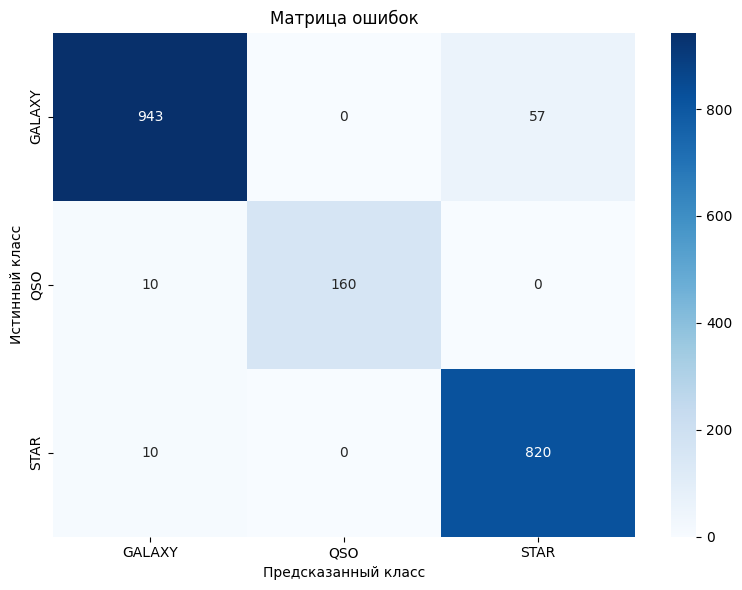

In [24]:
best_k = grid_search_h3.best_params_['n_neighbors']
best_weights = grid_search_h3.best_params_['weights']

my_knn_classifier_improved = MyKNNClassifier(n_neighbors=best_k, weights=best_weights)
my_knn_classifier_improved.fit(X_train_class_h1_scaled, y_train_class_h1)
y_pred_my_class_improved = my_knn_classifier_improved.predict(X_test_class_h1_scaled)

print("Результаты имплементированной модели с улучшениями:")
my_class_metrics_improved = evaluate_classification_model(y_test_class_h1, y_pred_my_class_improved, class_names)

Сравним результаты имплементированной модели с улучшениями с улучшенным бейзлайном из пункта 3:

In [25]:
comparison_my_class_improved = pd.DataFrame({
    'Модель': ['Улучшенный бейзлайн (sklearn)', 'Имплементированная модель с улучшениями'],
    'Accuracy': [class_metrics_improved['accuracy'], my_class_metrics_improved['accuracy']],
    'Macro F1': [class_metrics_improved['macro_f1'], my_class_metrics_improved['macro_f1']]
})

print("Сравнение имплементированной модели с улучшениями с улучшенным бейзлайном:")
print(comparison_my_class_improved.to_string(index=False))

Сравнение имплементированной модели с улучшениями с улучшенным бейзлайном:
                                 Модель  Accuracy  Macro F1
          Улучшенный бейзлайн (sklearn)    0.9615   0.96374
Имплементированная модель с улучшениями    0.9615   0.96374


### Регрессия

Реализуем алгоритм KNN для регрессии с нуля:

In [26]:
class MyKNNRegressor:
    def __init__(self, n_neighbors=5, weights='uniform'):
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self
    
    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def _get_neighbors(self, x):
        distances = []
        for i in range(len(self.X_train)):
            dist = self._euclidean_distance(x, self.X_train[i])
            distances.append((dist, self.y_train[i]))
        distances.sort(key=lambda t: t[0])
        neighbors = distances[:self.n_neighbors]
        return neighbors
    
    def predict(self, X):
        predictions = []
        X = np.array(X)
        for x in X:
            neighbors = self._get_neighbors(x)
            if self.weights == 'uniform':
                neighbor_values = [value for _, value in neighbors]
                prediction = np.mean(neighbor_values)
            else:  
                neighbor_values = [value for _, value in neighbors]
                neighbor_distances = [dist for dist, _ in neighbors]
                weights = [1.0 / (d + 1e-10) for d in neighbor_distances]
                prediction = np.average(neighbor_values, weights=weights)
            predictions.append(prediction)
        return np.array(predictions)

Обучим имплементированную модель на исходных данных (без улучшений):

In [27]:
my_knn_regressor = MyKNNRegressor(n_neighbors=5, weights='uniform')
my_knn_regressor.fit(X_train_reg.values, y_train_reg.values)
y_pred_my_reg = my_knn_regressor.predict(X_test_reg.values)

print("Результаты имплементированной модели регрессии (базовый вариант):")
my_reg_metrics = evaluate_regression_model(y_test_reg, y_pred_my_reg)

Результаты имплементированной модели регрессии (базовый вариант):
1. MAE: 1.5560

2. MSE: 5.1315

3. RMSE: 2.2653

4. R²: 0.5260


Сравним результаты имплементированной модели с базовым бейзлайном из пункта 2:

In [28]:
comparison_my_reg = pd.DataFrame({
    'Модель': ['Базовый бейзлайн (sklearn)', 'Имплементированная модель'],
    'MAE': [reg_metrics['mae'], my_reg_metrics['mae']],
    'RMSE': [reg_metrics['rmse'], my_reg_metrics['rmse']],
    'R²': [reg_metrics['r2'], my_reg_metrics['r2']]
})

print("Сравнение имплементированной модели с базовым бейзлайном:")
print(comparison_my_reg.to_string(index=False))

Сравнение имплементированной модели с базовым бейзлайном:
                    Модель      MAE     RMSE       R²
Базовый бейзлайн (sklearn) 1.555981 2.265278 0.525969
 Имплементированная модель 1.555981 2.265278 0.525969


Теперь применим техники из улучшенного бейзлайна (стандартизация, оптимальный k, взвешенные расстояния):

In [29]:
best_k_reg = grid_search_reg_h3.best_params_['n_neighbors']
best_weights_reg = grid_search_reg_h3.best_params_['weights']

my_knn_regressor_improved = MyKNNRegressor(n_neighbors=best_k_reg, weights=best_weights_reg)
my_knn_regressor_improved.fit(X_train_reg_h1_scaled, y_train_reg.values)
y_pred_my_reg_improved = my_knn_regressor_improved.predict(X_test_reg_h1_scaled)

print("Результаты имплементированной модели с улучшениями:")
my_reg_metrics_improved = evaluate_regression_model(y_test_reg, y_pred_my_reg_improved)

Результаты имплементированной модели с улучшениями:
1. MAE: 1.5752

2. MSE: 5.1252

3. RMSE: 2.2639

4. R²: 0.5265


Сравним результаты имплементированной модели с улучшениями с улучшенным бейзлайном из пункта 3:

In [30]:
comparison_my_reg_improved = pd.DataFrame({
    'Модель': ['Улучшенный бейзлайн (sklearn)', 'Имплементированная модель с улучшениями'],
    'MAE': [reg_metrics_improved['mae'], my_reg_metrics_improved['mae']],
    'RMSE': [reg_metrics_improved['rmse'], my_reg_metrics_improved['rmse']],
    'R²': [reg_metrics_improved['r2'], my_reg_metrics_improved['r2']]
})

print("Сравнение имплементированной модели с улучшениями с улучшенным бейзлайном:")
print(comparison_my_reg_improved.to_string(index=False))

Сравнение имплементированной модели с улучшениями с улучшенным бейзлайном:
                                 Модель      MAE     RMSE       R²
          Улучшенный бейзлайн (sklearn) 1.575222 2.263895 0.526548
Имплементированная модель с улучшениями 1.575222 2.263895 0.526548


## Общие выводы по результатам всех моделей

### Классификация

Сравним все 4 модели: базовый бейзлайн из sklearn, имплементированную модель базового бейзлайна, модель с улучшенным бейзлайном из sklearn и имплементированную модель улучшенного бейзлайна.

In [ ]:
final_comparison_class = pd.DataFrame({
    'Модель': [
        'Базовый бейзлайн (sklearn)',
        'Имплементированная модель базового бейзлайна',
        'Улучшенный бейзлайн (sklearn)',
        'Имплементированная модель улучшенного бейзлайна'
    ],
    'Accuracy': [
        class_metrics['accuracy'],
        my_class_metrics['accuracy'],
        class_metrics_improved['accuracy'],
        my_class_metrics_improved['accuracy']
    ],
    'Macro F1': [
        class_metrics['macro_f1'],
        my_class_metrics['macro_f1'],
        class_metrics_improved['macro_f1'],
        my_class_metrics_improved['macro_f1']
    ]
})

print("ОБЩЕЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ КЛАССИФИКАЦИИ")

print(final_comparison_class.to_string(index=False))
print("\n")

print("Детальное сравнение метрик по классам:")
print("\n1. Базовый бейзлайн (sklearn):")
print(f"   Precision: {class_metrics['precision']}")
print(f"   Recall: {class_metrics['recall']}")
print(f"   F1-score: {class_metrics['f1']}")

print("\n2. Имплементированная модель базового бейзлайна:")
print(f"   Precision: {my_class_metrics['precision']}")
print(f"   Recall: {my_class_metrics['recall']}")
print(f"   F1-score: {my_class_metrics['f1']}")

print("\n3. Улучшенный бейзлайн (sklearn):")
print(f"   Precision: {class_metrics_improved['precision']}")
print(f"   Recall: {class_metrics_improved['recall']}")
print(f"   F1-score: {class_metrics_improved['f1']}")

print("\n4. Имплементированная модель улучшенного бейзлайна:")
print(f"   Precision: {my_class_metrics_improved['precision']}")
print(f"   Recall: {my_class_metrics_improved['recall']}")
print(f"   F1-score: {my_class_metrics_improved['f1']}")

print("ВЫВОДЫ ПО КЛАССИФИКАЦИИ:")

print(f"1. Базовый бейзлайн (sklearn): Accuracy = {class_metrics['accuracy']:.4f}, Macro F1 = {class_metrics['macro_f1']:.4f}")
print(f"2. Имплементированная модель базового бейзлайна: Accuracy = {my_class_metrics['accuracy']:.4f}, Macro F1 = {my_class_metrics['macro_f1']:.4f}")
print(f"3. Улучшенный бейзлайн (sklearn): Accuracy = {class_metrics_improved['accuracy']:.4f}, Macro F1 = {class_metrics_improved['macro_f1']:.4f}")
print(f"4. Имплементированная модель улучшенного бейзлайна: Accuracy = {my_class_metrics_improved['accuracy']:.4f}, Macro F1 = {my_class_metrics_improved['macro_f1']:.4f}")
print("\nУлучшение базового бейзлайна (sklearn) → улучшенный бейзлайн (sklearn):")
print(f"  Accuracy: {((class_metrics_improved['accuracy'] - class_metrics['accuracy']) / class_metrics['accuracy'] * 100):.2f}%")
print(f"  Macro F1: {((class_metrics_improved['macro_f1'] - class_metrics['macro_f1']) / class_metrics['macro_f1'] * 100):.2f}%")
print("\nСравнение имплементированной модели с sklearn (улучшенный бейзлайн):")
print(f"  Разница в Accuracy: {abs(class_metrics_improved['accuracy'] - my_class_metrics_improved['accuracy']):.6f}")
print(f"  Разница в Macro F1: {abs(class_metrics_improved['macro_f1'] - my_class_metrics_improved['macro_f1']):.6f}")

ОБЩЕЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ КЛАССИФИКАЦИИ
                                         Модель  Accuracy  Macro F1
                     Базовый бейзлайн (sklearn)    0.9485  0.953601
   Имплементированная модель базового бейзлайна    0.9485  0.953601
                  Улучшенный бейзлайн (sklearn)    0.9615  0.963740
Имплементированная модель улучшенного бейзлайна    0.9615  0.963740


Детальное сравнение метрик по классам:

1. Базовый бейзлайн (sklearn):
   Precision: [0.97454931 0.97849462 0.91389208]
   Recall: [0.92269076 0.95789474 0.97788698]
   F1-score: [0.94791129 0.96808511 0.94480712]

2. Имплементированная модель базового бейзлайна:
   Precision: [0.97454931 0.97849462 0.91389208]
   Recall: [0.92269076 0.95789474 0.97788698]
   F1-score: [0.94791129 0.96808511 0.94480712]

3. Улучшенный бейзлайн (sklearn):
   Precision: [0.97923157 1.         0.9350057 ]
   Recall: [0.943      0.94117647 0.98795181]
   F1-score: [0.96077433 0.96969697 0.96074985]

4. Имплементированная модель 

### Регрессия

Сравним все 4 модели: базовый бейзлайн из sklearn, имплементированную модель базового бейзлайна, модель с улучшенным бейзлайном из sklearn и имплементированную модель улучшенного бейзлайна.

In [32]:
final_comparison_reg = pd.DataFrame({
    'Модель': [
        'Базовый бейзлайн (sklearn)',
        'Имплементированная модель базового бейзлайна',
        'Улучшенный бейзлайн (sklearn)',
        'Имплементированная модель улучшенного бейзлайна'
    ],
    'MAE': [
        reg_metrics['mae'],
        my_reg_metrics['mae'],
        reg_metrics_improved['mae'],
        my_reg_metrics_improved['mae']
    ],
    'RMSE': [
        reg_metrics['rmse'],
        my_reg_metrics['rmse'],
        reg_metrics_improved['rmse'],
        my_reg_metrics_improved['rmse']
    ],
    'R²': [
        reg_metrics['r2'],
        my_reg_metrics['r2'],
        reg_metrics_improved['r2'],
        my_reg_metrics_improved['r2']
    ]
})

print("ОБЩЕЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ РЕГРЕССИИ")
print(final_comparison_reg.to_string(index=False))

print("\nВЫВОДЫ ПО РЕГРЕССИИ:")
print(f"1. Базовый бейзлайн (sklearn): MAE = {reg_metrics['mae']:.4f}, RMSE = {reg_metrics['rmse']:.4f}, R² = {reg_metrics['r2']:.4f}")
print(f"2. Имплементированная модель базового бейзлайна: MAE = {my_reg_metrics['mae']:.4f}, RMSE = {my_reg_metrics['rmse']:.4f}, R² = {my_reg_metrics['r2']:.4f}")
print(f"3. Улучшенный бейзлайн (sklearn): MAE = {reg_metrics_improved['mae']:.4f}, RMSE = {reg_metrics_improved['rmse']:.4f}, R² = {reg_metrics_improved['r2']:.4f}")
print(f"4. Имплементированная модель улучшенного бейзлайна: MAE = {my_reg_metrics_improved['mae']:.4f}, RMSE = {my_reg_metrics_improved['rmse']:.4f}, R² = {my_reg_metrics_improved['r2']:.4f}")
print("\nУлучшение базового бейзлайна (sklearn) → улучшенный бейзлайн (sklearn):")
print(f"  MAE: {((reg_metrics['mae'] - reg_metrics_improved['mae']) / reg_metrics['mae'] * 100):.2f}% улучшение")
print(f"  RMSE: {((reg_metrics['rmse'] - reg_metrics_improved['rmse']) / reg_metrics['rmse'] * 100):.2f}% улучшение")
print(f"  R²: {((reg_metrics_improved['r2'] - reg_metrics['r2']) / abs(reg_metrics['r2']) * 100):.2f}% улучшение")
print("\nСравнение имплементированной модели с sklearn (улучшенный бейзлайн):")
print(f"  Разница в MAE: {abs(reg_metrics_improved['mae'] - my_reg_metrics_improved['mae']):.6f}")
print(f"  Разница в RMSE: {abs(reg_metrics_improved['rmse'] - my_reg_metrics_improved['rmse']):.6f}")
print(f"  Разница в R²: {abs(reg_metrics_improved['r2'] - my_reg_metrics_improved['r2']):.6f}")

ОБЩЕЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ РЕГРЕССИИ
                                         Модель      MAE     RMSE       R²
                     Базовый бейзлайн (sklearn) 1.555981 2.265278 0.525969
   Имплементированная модель базового бейзлайна 1.555981 2.265278 0.525969
                  Улучшенный бейзлайн (sklearn) 1.575222 2.263895 0.526548
Имплементированная модель улучшенного бейзлайна 1.575222 2.263895 0.526548

ВЫВОДЫ ПО РЕГРЕССИИ:
1. Базовый бейзлайн (sklearn): MAE = 1.5560, RMSE = 2.2653, R² = 0.5260
2. Имплементированная модель базового бейзлайна: MAE = 1.5560, RMSE = 2.2653, R² = 0.5260
3. Улучшенный бейзлайн (sklearn): MAE = 1.5752, RMSE = 2.2639, R² = 0.5265
4. Имплементированная модель улучшенного бейзлайна: MAE = 1.5752, RMSE = 2.2639, R² = 0.5265

Улучшение базового бейзлайна (sklearn) → улучшенный бейзлайн (sklearn):
  MAE: -1.24% улучшение
  RMSE: 0.06% улучшение
  R²: 0.11% улучшение

Сравнение имплементированной модели с sklearn (улучшенный бейзлайн):
  Разница в MAE: 0.00